In [1]:
from model import NeuralNetwork
from utils import load_mnist_data,MiniBatchGradientDescent, CrossEntropyLoss
from activation import Sigmoid, ReLU,LeakyReLU, Tanh
from visualize import plot_training_history, plot_confusion_matrix, plot_misclassified_examples
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train, X_val, X_test, y_train, y_val, y_test = load_mnist_data()

从缓存加载 MNIST 数据。


In [3]:

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (49000, 784)
y_train shape: (49000, 10)


In [6]:

input_dim = 784
output_dim = 10
baseline = NeuralNetwork(input_dim, output_dim, hidden_dims=[256,128], activation=ReLU(),lammbda=1e-4)
baseline1 = NeuralNetwork(input_dim, output_dim, hidden_dims=[512,256], activation=LeakyReLU(),lammbda=1e-3)
baseline2 = NeuralNetwork(input_dim, output_dim, hidden_dims=[128], activation=Tanh(),lammbda=0)

optimizer = MiniBatchGradientDescent(learning_rate=0.01, batch_size=64)
loss = CrossEntropyLoss()
baseline1.compile(loss, optimizer)

Epoch 1/100 - loss: 2.2618 - acc: 0.3773 - val_loss: 2.2627 - val_acc: 0.3701
Epoch 2/100 - loss: 1.3121 - acc: 0.6178 - val_loss: 1.3245 - val_acc: 0.6077
Epoch 3/100 - loss: 0.6734 - acc: 0.7995 - val_loss: 0.6939 - val_acc: 0.7937
Epoch 4/100 - loss: 0.5113 - acc: 0.8514 - val_loss: 0.5293 - val_acc: 0.8434
Epoch 5/100 - loss: 0.4356 - acc: 0.8751 - val_loss: 0.4512 - val_acc: 0.8661
Epoch 6/100 - loss: 0.3961 - acc: 0.8881 - val_loss: 0.4109 - val_acc: 0.8797
Epoch 7/100 - loss: 0.3721 - acc: 0.8951 - val_loss: 0.3875 - val_acc: 0.8874
Epoch 8/100 - loss: 0.3569 - acc: 0.8994 - val_loss: 0.3736 - val_acc: 0.8904
Epoch 9/100 - loss: 0.3407 - acc: 0.9030 - val_loss: 0.3586 - val_acc: 0.8950
Epoch 10/100 - loss: 0.3296 - acc: 0.9072 - val_loss: 0.3479 - val_acc: 0.8989
Epoch 11/100 - loss: 0.3205 - acc: 0.9100 - val_loss: 0.3395 - val_acc: 0.9024
Epoch 12/100 - loss: 0.3101 - acc: 0.9120 - val_loss: 0.3316 - val_acc: 0.9030
Epoch 13/100 - loss: 0.3053 - acc: 0.9141 - val_loss: 0.3248 

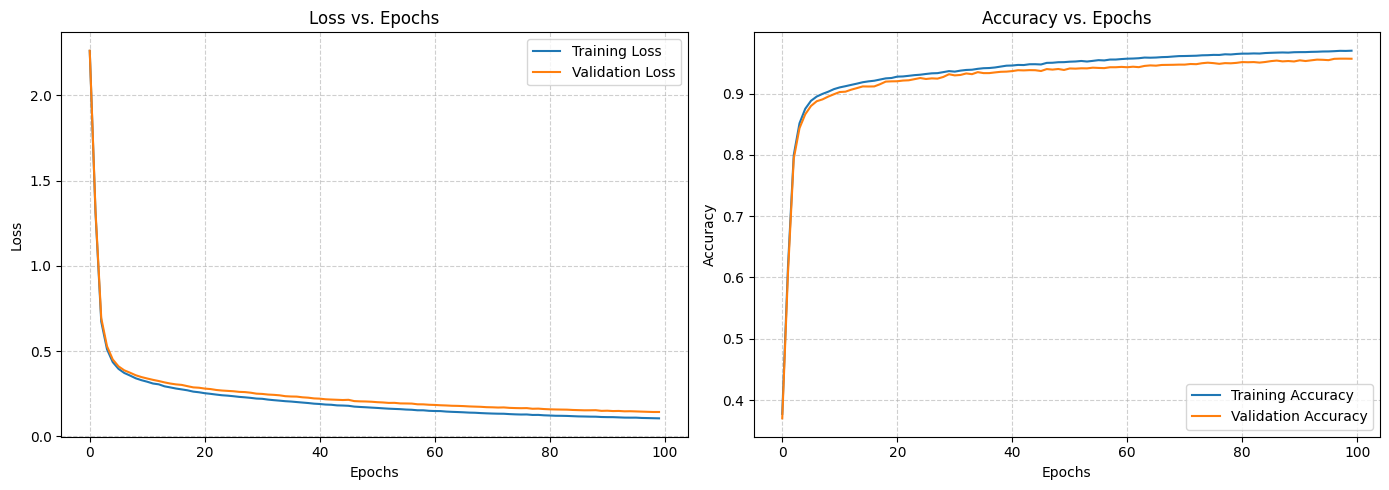

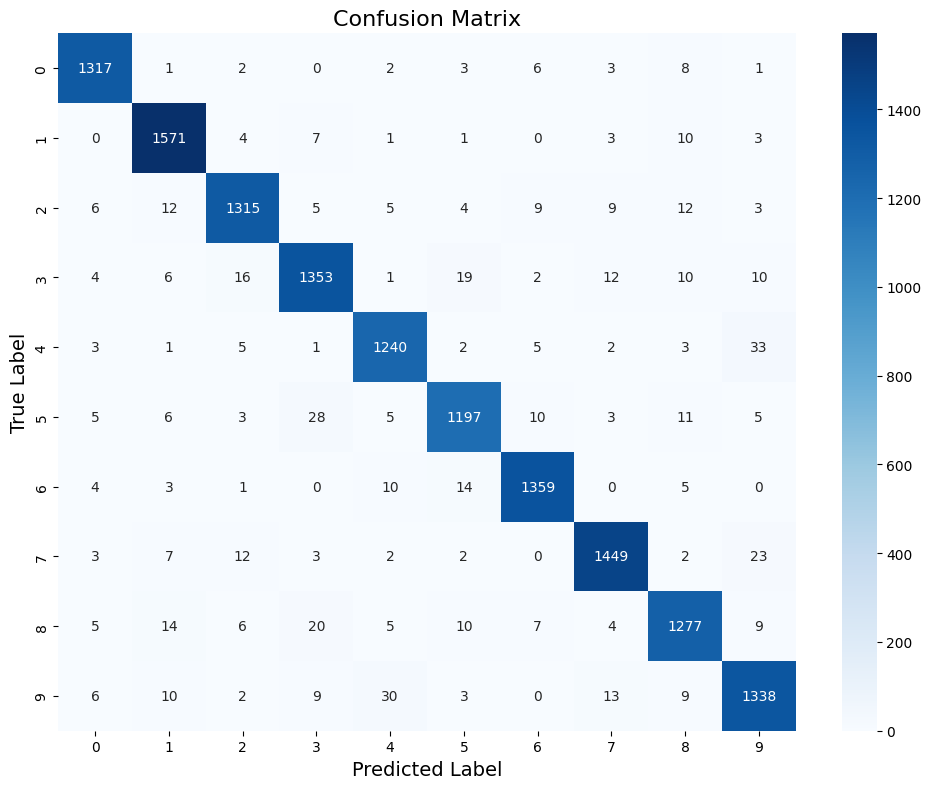

Classification Accuracy: 95.83%
Class 0:
  Precision: 0.973
  Recall: 0.981
  F1-score: 0.977
Class 1:
  Precision: 0.963
  Recall: 0.982
  F1-score: 0.972
Class 2:
  Precision: 0.963
  Recall: 0.953
  F1-score: 0.958
Class 3:
  Precision: 0.949
  Recall: 0.944
  F1-score: 0.946
Class 4:
  Precision: 0.953
  Recall: 0.958
  F1-score: 0.955
Class 5:
  Precision: 0.954
  Recall: 0.940
  F1-score: 0.947
Class 6:
  Precision: 0.972
  Recall: 0.973
  F1-score: 0.973
Class 7:
  Precision: 0.967
  Recall: 0.964
  F1-score: 0.966
Class 8:
  Precision: 0.948
  Recall: 0.941
  F1-score: 0.945
Class 9:
  Precision: 0.939
  Recall: 0.942
  F1-score: 0.941


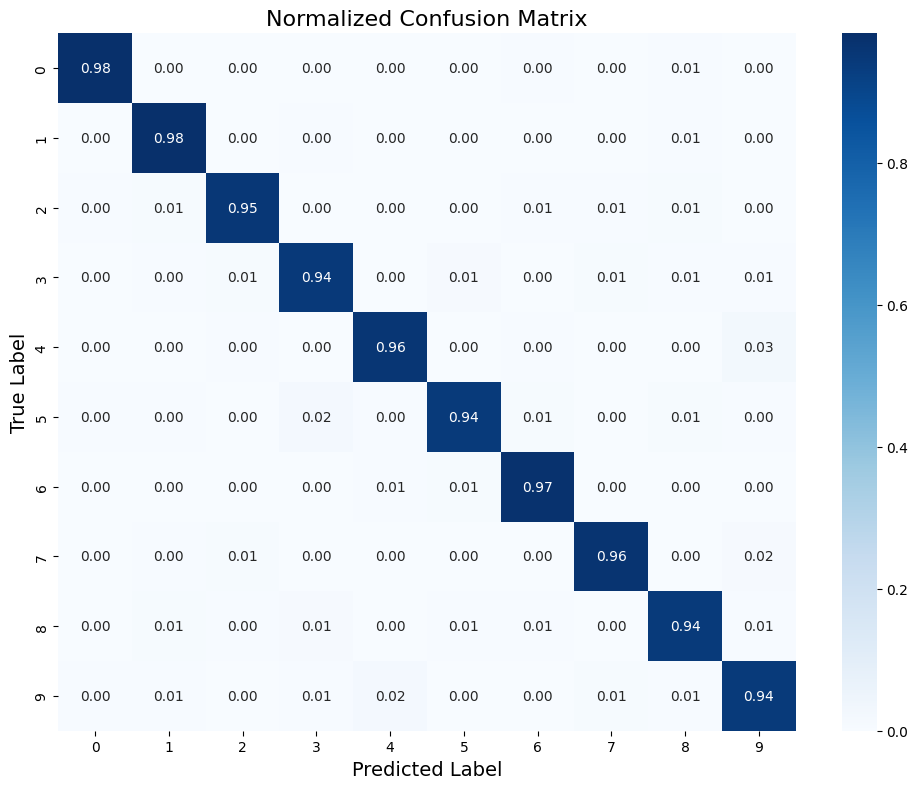

Classification Accuracy: 95.78%


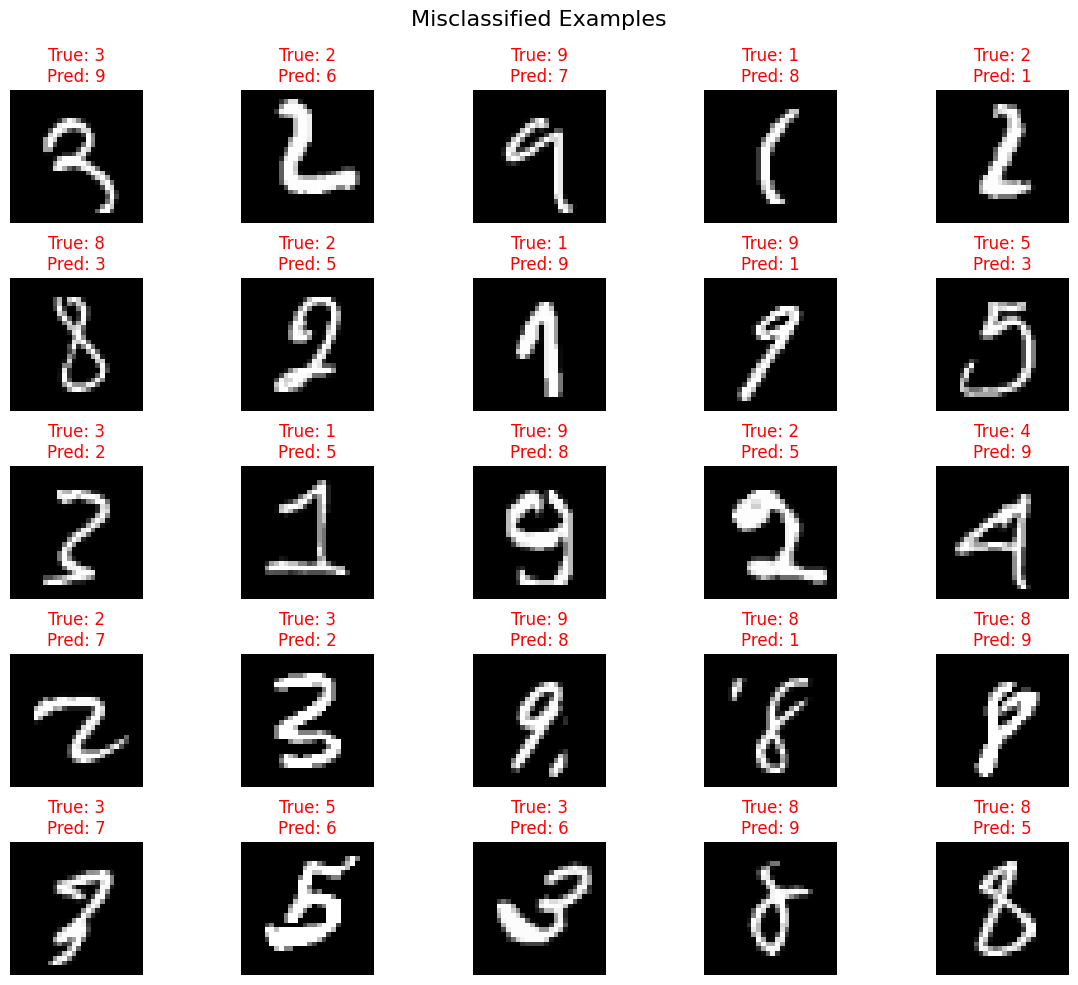

In [ ]:
import os
import time
from datetime import datetime

# 训练模型
history = baseline1.fit(X_train, y_train, epochs=100, X_val=X_val, y_val=y_val, verbose=1)

# 或者直接使用 model.history
# Create a directory for this run
run_time = datetime.now().strftime("%Y%m%d_%H%M%S")
run_dir = os.path.join('runs', f'run_{run_time}')
os.makedirs(run_dir, exist_ok=True)

# Plot and save training history
history_path = os.path.join(run_dir, 'training_history.png')
plot_training_history(baseline1.history, save_path=history_path)
print(f"Training history plot saved to {history_path}")

# Also save the training metrics as a text file
with open(os.path.join(run_dir, 'training_metrics.txt'), 'w') as f:
    f.write(f"Final training accuracy: {baseline1.history['train_acc'][-1]:.4f}\n")
    f.write(f"Final validation accuracy: {baseline1.history['val_acc'][-1]:.4f}\n")
    f.write(f"Final training loss: {baseline1.history['train_loss'][-1]:.4f}\n")
    f.write(f"Final validation loss: {baseline1.history['val_loss'][-1]:.4f}\n")

y_pred_probs = baseline1.predict(X_test)  # 获取预测概率
y_pred = np.argmax(y_pred_probs, axis=1)  # 将概率转换为类别标签
y_true = np.argmax(y_test, axis=1)  # 将one-hot编码的真实标签转换为类别标签

# 2. 可视化混淆矩阵
plot_confusion_matrix(y_true, y_pred, class_names=list(range(10)), normalize=False)
plot_confusion_matrix(y_true, y_pred, class_names=list(range(10)), normalize=True)

# 3. 可视化错误分类样本
plot_misclassified_examples(X_test, y_true, y_pred, class_names=list(range(10)))